# Experiment 6: Understanding Clustering - I

## Task 1

You have to solve the customer segmentation problem by using KMeans clustering and the dataset “Mall_Customers.csv”. 

### Import Libraries

Import the important libraries 

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

### Import dataset

Load and view the dataset

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Feature Scaling using MinMaxScaler

MinMaxScaler() is a data normalization technique in machine learning that scales and transforms the features of a dataset to have values between 0 and 1. This normalization method is used to ensure that all features are on a similar scale.

In [3]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(df[['Annual Income (k$)','Spending Score (1-100)']])
df_scale = pd.DataFrame(scale, columns = ['Annual Income (k$)','Spending Score (1-100)']);
df_scale.head(5)

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


### Applying K-Means

Applying K-Means with 2 Clusters

In [4]:
km=KMeans(n_clusters=2,n_init=20)
y_predicted = km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

Finding the centroid of the two clusters by using the attribute ‘cluster_centers_’ 

In [5]:
km.cluster_centers_

array([[79.6       , 50.12727273],
       [37.28888889, 50.28888889]])

Visualize the results by using the scatterplot from seaborn library

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

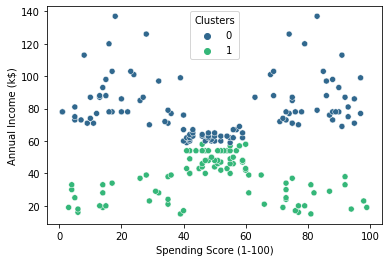

In [6]:
df['Clusters'] = km.labels_
sns.scatterplot(x="Spending Score (1-100)", y="Annual Income (k$)",hue = 'Clusters',  data=df,palette='viridis')

## Elbow Method with Within-Cluster-Sum of Squared Error (WCSS)

## Task 2

finding optimun number of clusters in K means

### Finding the optimum value of K

Calculating the WCSS for K=2 to k=12 and calculating the WCSS in each iteration by using the following code

In [7]:
K=range(2,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,n_init=20)
    kmeans=kmeans.fit(df_scale)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

## Plot the graph

Ploting the WCSS vs K cluster graph

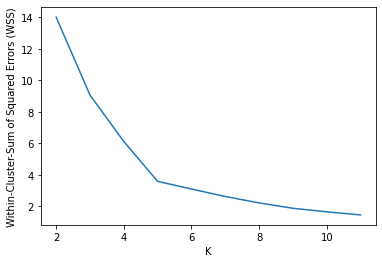

In [8]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

## Using Optimal Value of K

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

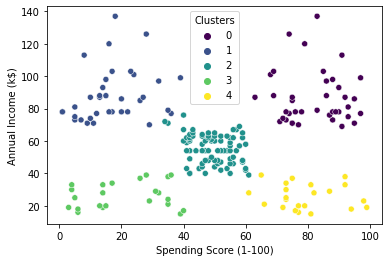

In [9]:
kmeans = cluster.KMeans(n_clusters=5,n_init=20 )
kmeans = kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Clusters'] = kmeans.labels_
sns.scatterplot(x="Spending Score (1-100)", y="Annual Income (k$)",hue = 'Clusters',  data=df,palette='viridis')

## Task 3: Applying PCA

Apply KMeans clustering after reducing the dimensionality of dataset into two components. 

In [10]:
df_scale

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959
...,...,...
195,0.860656,0.795918
196,0.909836,0.275510
197,0.909836,0.744898
198,1.000000,0.173469


In [11]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scale)
pca_df = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2'])
pca_df.head()

,principal component 1,principal component 2
0,0.123331,-0.370554
1,-0.305114,-0.380973
2,0.459767,-0.354173
3,-0.264509,-0.371786
4,0.112731,-0.354413
